# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('01-09-2021.csv')

FileNotFoundError: [Errno 2] No such file or directory: '01-09-2021.csv'

#### Display the top 5 rows in the data

In [ ]:
print("Top 5 rows of the dataset:")
print(data.head())

Top 5 rows of the dataset:
   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-01-10 05:22:12  33.93911   
1   NaN    NaN            NaN        Albania  2021-01-10 05:22:12  41.15330   
2   NaN    NaN            NaN        Algeria  2021-01-10 05:22:12  28.03390   
3   NaN    NaN            NaN        Andorra  2021-01-10 05:22:12  42.50630   
4   NaN    NaN            NaN         Angola  2021-01-10 05:22:12 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953      53400    2264      43740    7396  Afghanistan   
1  20.168300      63033    1233      37327   24473      Albania   
2   1.659600     101913    2803      69011   30099      Algeria   
3   1.521800       8586      85       7724     777      Andorra   
4  17.873900      18156     416      13205    4535       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     137.175124             4.239700  
1    2190.31899

#### Show the information of the dataset

In [ ]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [ ]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64


### Question 2

#### Show the number of Confirmed cases by Country

In [ ]:
country_confirmed = data.groupby('Country_Region')['Confirmed'].sum()
print("\nConfirmed cases by country:")
print(country_confirmed)


Confirmed cases by country:
Country_Region
Afghanistan              53400
Albania                  63033
Algeria                 101913
Andorra                   8586
Angola                   18156
                         ...  
West Bank and Gaza      146701
Winter Olympics 2022         0
Yemen                     2104
Zambia                   26567
Zimbabwe                 20499
Name: Confirmed, Length: 200, dtype: int64


#### Show the number of Deaths by Country

In [ ]:
country_deaths = data.groupby('Country_Region')['Deaths'].sum()
print("\nDeaths by country:")
print(country_deaths)


Deaths by country:
Country_Region
Afghanistan             2264
Albania                 1233
Algeria                 2803
Andorra                   85
Angola                   416
                        ... 
West Bank and Gaza      1583
Winter Olympics 2022       0
Yemen                    610
Zambia                   464
Zimbabwe                 483
Name: Deaths, Length: 200, dtype: int64


#### Show the number of Recovered cases by Country

In [ ]:
country_recovered = data.groupby('Country_Region')['Recovered'].sum()
print("\nRecovered cases by country:")
print(country_recovered)


Recovered cases by country:
Country_Region
Afghanistan              43740
Albania                  37327
Algeria                  69011
Andorra                   7724
Angola                   13205
                         ...  
West Bank and Gaza      130102
Winter Olympics 2022         0
Yemen                     1407
Zambia                   20512
Zimbabwe                 12439
Name: Recovered, Length: 200, dtype: int64


#### Show the number of Active Cases by Country

In [ ]:
country_active = data.groupby('Country_Region')['Active'].sum()
print("\nActive cases by country:")
print(country_active)


Active cases by country:
Country_Region
Afghanistan              7396
Albania                 24473
Algeria                 30099
Andorra                   777
Angola                   4535
                        ...  
West Bank and Gaza      15016
Winter Olympics 2022        0
Yemen                      87
Zambia                   5591
Zimbabwe                 7577
Name: Active, Length: 200, dtype: int64


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [ ]:
latest_stats = data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
print("\nLatest stats by country:")
print(latest_stats)


Latest stats by country:
                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Afghanistan               53400    2264      43740    7396
Albania                   63033    1233      37327   24473
Algeria                  101913    2803      69011   30099
Andorra                    8586      85       7724     777
Angola                    18156     416      13205    4535
...                         ...     ...        ...     ...
West Bank and Gaza       146701    1583     130102   15016
Winter Olympics 2022          0       0          0       0
Yemen                      2104     610       1407      87
Zambia                    26567     464      20512    5591
Zimbabwe                  20499     483      12439    7577

[200 rows x 4 columns]


### Question 3

### Show the countries with no recovered cases

In [ ]:
no_recovered = latest_stats[latest_stats['Recovered'] == 0]
print("\nCountries with no recovered cases:")
print(no_recovered)


Countries with no recovered cases:
                      Confirmed  Deaths  Recovered    Active
Country_Region                                              
Antarctica                    0       0          0         0
Belgium                  662694   20038          0    651639
Kiribati                      0       0          0         0
Korea, North                  0       0          0         0
Nauru                         0       0          0         0
Palau                         0       0          0         0
Serbia                   356125    3513          0    352612
Summer Olympics 2020          0       0          0         0
Sweden                   489471    9433          0    480038
Tonga                         0       0          0         0
Tuvalu                        0       0          0         0
US                     22403255  377679          0  21974518
Winter Olympics 2022          0       0          0         0


#### Show the countries with no confirmed cases

In [ ]:
no_confirmed = latest_stats[latest_stats['Confirmed'] == 0]
print("\nCountries with no confirmed cases:")
print(no_confirmed)


Countries with no confirmed cases:
                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Antarctica                    0       0          0       0
Kiribati                      0       0          0       0
Korea, North                  0       0          0       0
Nauru                         0       0          0       0
Palau                         0       0          0       0
Summer Olympics 2020          0       0          0       0
Tonga                         0       0          0       0
Tuvalu                        0       0          0       0
Winter Olympics 2022          0       0          0       0


#### Show the countries with no deaths

In [ ]:
no_deaths = latest_stats[latest_stats['Deaths'] == 0]
print("\nCountries with no deaths:")
print(no_deaths)


Countries with no deaths:
                                  Confirmed  Deaths  Recovered  Active
Country_Region                                                        
Antarctica                                0       0          0       0
Cambodia                                391       0        371      20
Dominica                                106       0         98       8
Holy See                                 27       0         15      12
Kiribati                                  0       0          0       0
Korea, North                              0       0          0       0
Laos                                     41       0         40       1
Marshall Islands                          4       0          4       0
Nauru                                     0       0          0       0
Palau                                     0       0          0       0
Saint Kitts and Nevis                    34       0         31       3
Saint Vincent and the Grenadines        225       

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [ ]:
top_confirmed = country_confirmed.sort_values(ascending=False).head(10)
print("\nTop 10 countries by confirmed cases:")
print(top_confirmed)


Top 10 countries by confirmed cases:
Country_Region
US                22403255
India             10450284
Brazil             8081091
Russia             3344175
United Kingdom     3026299
France             2824882
Turkey             2317118
Italy              2257866
Spain              2050360
Germany            1905100
Name: Confirmed, dtype: int64


#### Show the Top 10 Countries with Active cases

In [ ]:
top_active = country_active.sort_values(ascending=False).head(10)
print("\nTop 10 countries by active cases:")
print(top_active)


Top 10 countries by active cases:
Country_Region
US                21974518
United Kingdom     2938491
France             2549059
Spain              1848110
Mexico             1390832
Peru                931424
Netherlands         855321
Brazil              667957
Belgium             651639
Italy               572842
Name: Active, dtype: int64


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [ ]:
import matplotlib.pyplot as plt

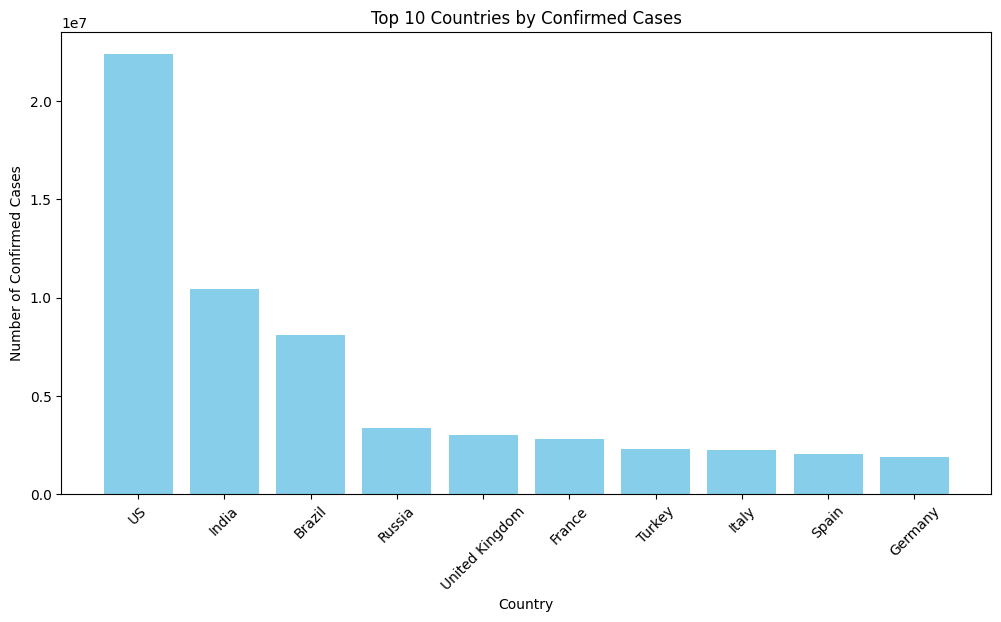

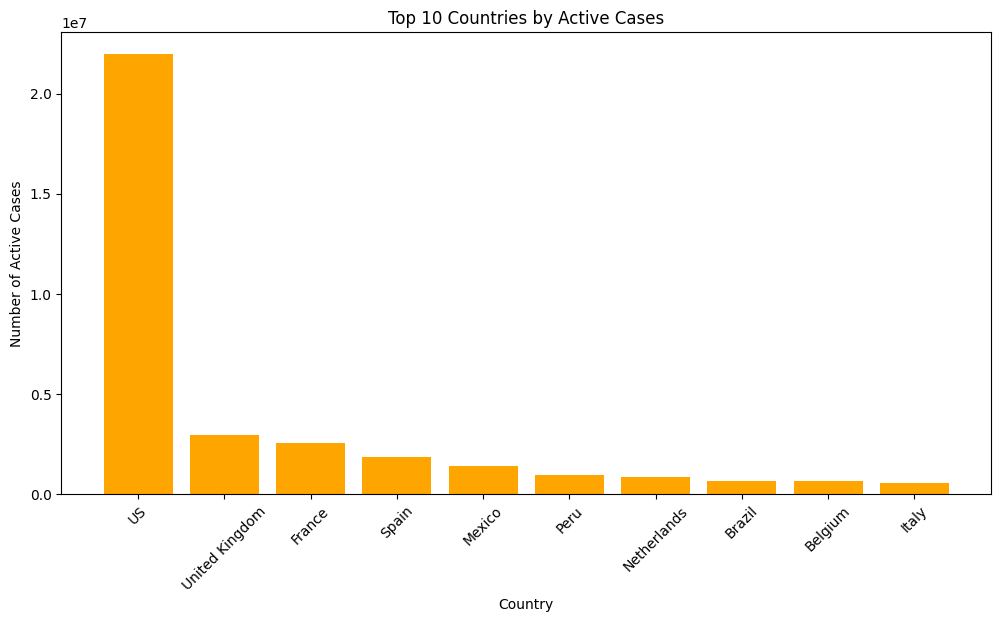

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_confirmed.index, top_confirmed.values, color='skyblue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_active.index, top_active.values, color='orange')
plt.title('Top 10 Countries by Active Cases')
plt.xlabel('Country')
plt.ylabel('Number of Active Cases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
high_deaths = data[data['Deaths'] > 50000]
print("\nRegions with deaths exceeding 50,000:")
print(high_deaths[['Country_Region', 'Province_State', 'Deaths', 'Confirmed', 'Recovered', 'Active']])


Regions with deaths exceeding 50,000:
      Country_Region Province_State  Deaths  Confirmed  Recovered   Active
215           France            NaN   67229    2762120     178036  2516855
268            India    Maharashtra   50027    1965556    1861400    54129
286             Iran            NaN   56100    1280438    1067466   156872
3957  United Kingdom        England   88347    2613838          0  2543297


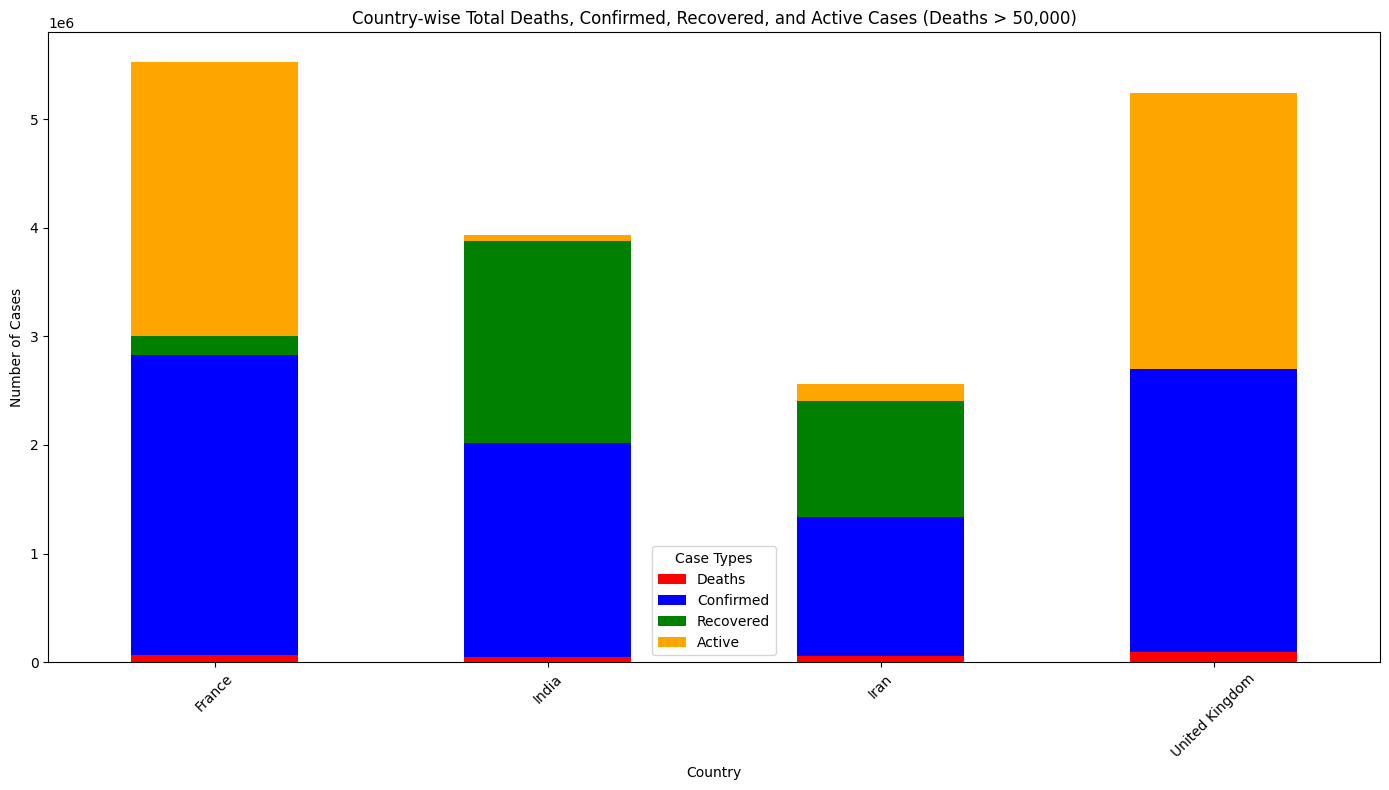

In [ ]:
if not high_deaths.empty:
    grouped_high_deaths = high_deaths.groupby('Country_Region')[['Deaths', 'Confirmed', 'Recovered', 'Active']].sum()
    grouped_high_deaths.plot(kind='bar', figsize=(14, 8), stacked=True, color=['red', 'blue', 'green', 'orange'])
    plt.title('Country-wise Total Deaths, Confirmed, Recovered, and Active Cases (Deaths > 50,000)')
    plt.xlabel('Country')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.legend(title="Case Types")
    plt.tight_layout()
    plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [ ]:
import plotly.express as px

In [ ]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [ ]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [9]:
data_usa = data[data['Country_Region'] == 'US']
state_deaths = data_usa.groupby('Province_State')['Deaths'].sum().reset_index()

fig = px.bar(state_deaths.sort_values(by='Deaths', ascending=False),
             x='Province_State', y='Deaths', color='Deaths',
             title='USA Province/State-wise Deaths',
             labels={'Province_State': 'Province/State', 'Deaths': 'Number of Deaths'})
fig.update_layout(xaxis_title='Province/State', yaxis_title='Number of Deaths', xaxis_tickangle=-45)
fig.show()


NameError: name 'data' is not defined

### Question 7

### Plot Province/State Wise Active Cases in USA

In [ ]:
state_active = data_usa.groupby('Province_State')['Active'].sum().reset_index()

fig = px.bar(state_active.sort_values(by='Active', ascending=False),
             x='Province_State', y='Active', color='Active',
             title='USA Province/State-wise Active Cases',
             labels={'Province_State': 'Province/State', 'Active': 'Number of Active Cases'})
fig.update_layout(xaxis_title='Province/State', yaxis_title='Number of Active Cases', xaxis_tickangle=-45)
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [ ]:
state_confirmed = data_usa.groupby('Province_State')['Confirmed'].sum().reset_index()

fig = px.bar(state_confirmed.sort_values(by='Confirmed', ascending=False),
             x='Province_State', y='Confirmed', color='Confirmed',
             title='USA Province/State-wise Confirmed Cases',
             labels={'Province_State': 'Province/State', 'Confirmed': 'Number of Confirmed Cases'})
fig.update_layout(xaxis_title='Province/State', yaxis_title='Number of Confirmed Cases', xaxis_tickangle=-45)
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [ ]:
import plotly.express as px
import plotly.io as pio

In [ ]:
data['Last_Update'] = pd.to_datetime(data['Last_Update'])
worldwide_time = data.groupby(data['Last_Update'].dt.date)['Confirmed'].sum().reset_index()
worldwide_time.columns = ['Date', 'Confirmed']

fig = px.line(worldwide_time,
              x='Date', y='Confirmed',
              title='Worldwide Confirmed Cases Over Time',
              labels={'Date': 'Date', 'Confirmed': 'Number of Confirmed Cases'})
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Confirmed Cases')
fig.show()